# Numerical Result Part Figure 1: Recursive Level and Circuit Ancilla Usage

Ancilla qubits number vs recursive level for much larger BQEs
to demonstrate that the method could be powerful when more quantum resources are available.


In [1]:
import os
import numpy as np
import pickle as pk
import pandas as pd

from utils import determine_oracle_ancilla_usage


2024-02-27 19:00:18,817 - generate_qc.py[line:34] - WARNING: **USING GPU SIMULATOR**


In [2]:
###### WARNING: enable this part to recompute the output for drawing this figure #######
# num_var, num_sol, seed, sols, EQs
if 0:
    eqs_df = pk.load(open("output/eqs.pkl", "rb"))  # type: pd.DataFrame
    save_file = "output/figure1.pkl"
    cols = ["num_var", "num_sol", "seed", "level", "num_ancilla"]
    result = pd.DataFrame(columns=cols)
    if os.path.exists(save_file):
        result = pk.load(open(save_file, "rb"))

    levels = [1, 2, 3, 4]
    split = 2
    for idx, df in eqs_df.groupby("num_var"):
        for i, row in df.iterrows():
            eqs = row["eqs"]
            num_var = row["num_var"]
            num_sol = row["num_sol"]
            seed = row["seed"]
            for level in levels:

                part_size = int(np.ceil(len(eqs) / split))
                num_ancilla = determine_oracle_ancilla_usage(part_size, level=level)

                result = result.append(pd.DataFrame([[num_var, num_sol, seed, level, num_ancilla]], columns=cols), ignore_index=True)

    pk.dump(result, open(save_file, "wb+"))
    print(result)


In [3]:
graph1_data = pk.load(open("output/figure1.pkl", "rb"))
cols = ["num_var", "num_sol", "seed", "level", "num_ancilla"]
graph1_data = pd.DataFrame(graph1_data, columns=cols)
# num_var, level, depth, qc.num_ancillas
graph1_data

,num_var,num_sol,seed,level,num_ancilla
0,10,1,85029,1,6
1,10,1,85029,2,4
2,10,1,85029,3,4
3,10,1,85029,4,4
4,10,1,11854,1,5
...,...,...,...,...,...
6343,25,33,48899,4,5
6344,25,36,96189,1,10
6345,25,36,96189,2,5
6346,25,36,96189,3,5


In [6]:
df_first = graph1_data.groupby(['num_var', 'seed', 'level', "num_sol"]).first().reset_index()
graph1_data = df_first
df_first[df_first["num_sol"] == 1].groupby(["num_var", "level"]).count()

seed  num_sol  num_ancilla
num_var level                            
10      1        30       30           30
        2        30       30           30
        3        30       30           30
        4        30       30           30
12      1        30       30           30
        2        30       30           30
        3        30       30           30
        4        30       30           30
15      1        30       30           30
        2        30       30           30
        3        30       30           30
        4        30       30           30
18      1        30       30           30
        2        30       30           30
        3        30       30           30
        4        30       30           30
20      1        30       30           30
        2        30       30           30
        3        30       30           30
        4        30       30           30
22      1        30       30           30
        2        30       30           30
        3        30       30           30
        4        30       30           30
25      1        15       15           15
        2        15       15           15
        3        15       15           15
        4        15       15           15

/home/xli/.local/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/xli/.local/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/xli/.local/lib/python3.8/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may 

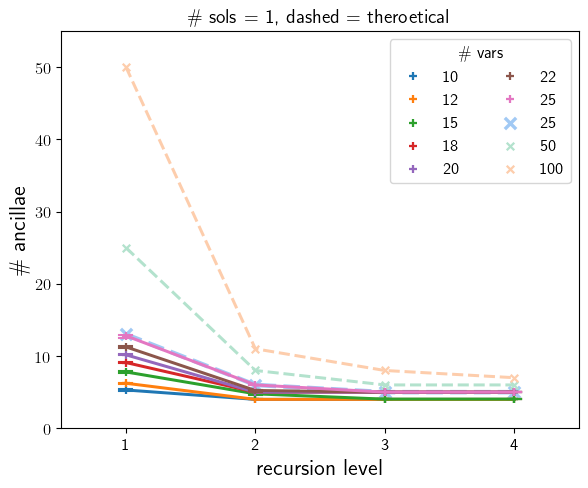

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

df = graph1_data.copy()
df[r"\# vars"] = df["num_var"]
fig, ax = plt.subplots(1, 1, figsize=(6,5))
sns.pointplot(
    data=df[df.num_sol==1], x="level", y="num_ancilla", hue=r"\# vars",
    ax=ax,
    errorbar=("ci", 95),
    n_boot=15,
    # errorbar=lambda x: (x.min(), x.max()),
    dodge=0.,
    capsize=.1,
    markers="+",
    linestyles=["-"] * 7,
    scale=0.8,
    errwidth=1.5,
)

df_theory = pd.DataFrame({
    r"\# vars": [25, 25, 25, 25, 50, 50, 50, 50, 100, 100, 100, 100],
    "level": [1, 2, 3, 4] * 3,
    "num_ancilla": [13, 6, 5, 5, 25, 8, 6, 6, 50, 11, 8, 7]
})
res3 = sns.pointplot(
    data=df_theory[df_theory[r"\# vars"] == 25], x="level", y="num_ancilla", hue=r"\# vars",
    ax=ax,
    errorbar=None,
    n_boot=None,
    dodge=0.,
    capsize=.1,
    markers="x",
    palette="pastel",
    linestyles=["--", "--", "--", "--"],
    scale=1.2,
    errwidth=1.5,
)
res2 = sns.pointplot(
    data=df_theory[df_theory[r"\# vars"] != 25], x="level", y="num_ancilla", hue=r"\# vars",
    ax=ax,
    errorbar=None,
    n_boot=None,
    dodge=0.,
    capsize=.1,
    markers="x",
    palette="Pastel2",
    linestyles=["--", "--", "--", "--"],
    scale=0.8,
    errwidth=1.5
)


# ax.set_yscale('log')
ax.set_ylim(0, 55)
# ax.set_yticks([3, 4, 5, 6, 8, 10, 15, 20, 25, 30])
# ax.set_yticklabels([3, 4, 5, 6, 8, 10, 15, 20, 25, 30])

ax.legend(loc='upper right', ncol=2, title=r"\# vars")
plt.title("\# sols = 1, dashed = theroetical", fontsize=14)
plt.tight_layout()

# Set the axis labels and title
plt.xlabel(r'recursion level', fontsize=16)
plt.ylabel(r'\# ancillae', fontsize=16)
# Show the plot
plt.savefig("../figure/level-vs-ancillae.eps")
plt.show()